In [1]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border: 0.5px solid #000000;
        text-align: center !important;
    }
    th {
        background-color: #008B8B;
    }
    
</style>

## Customer Segmentation UK Online Retail

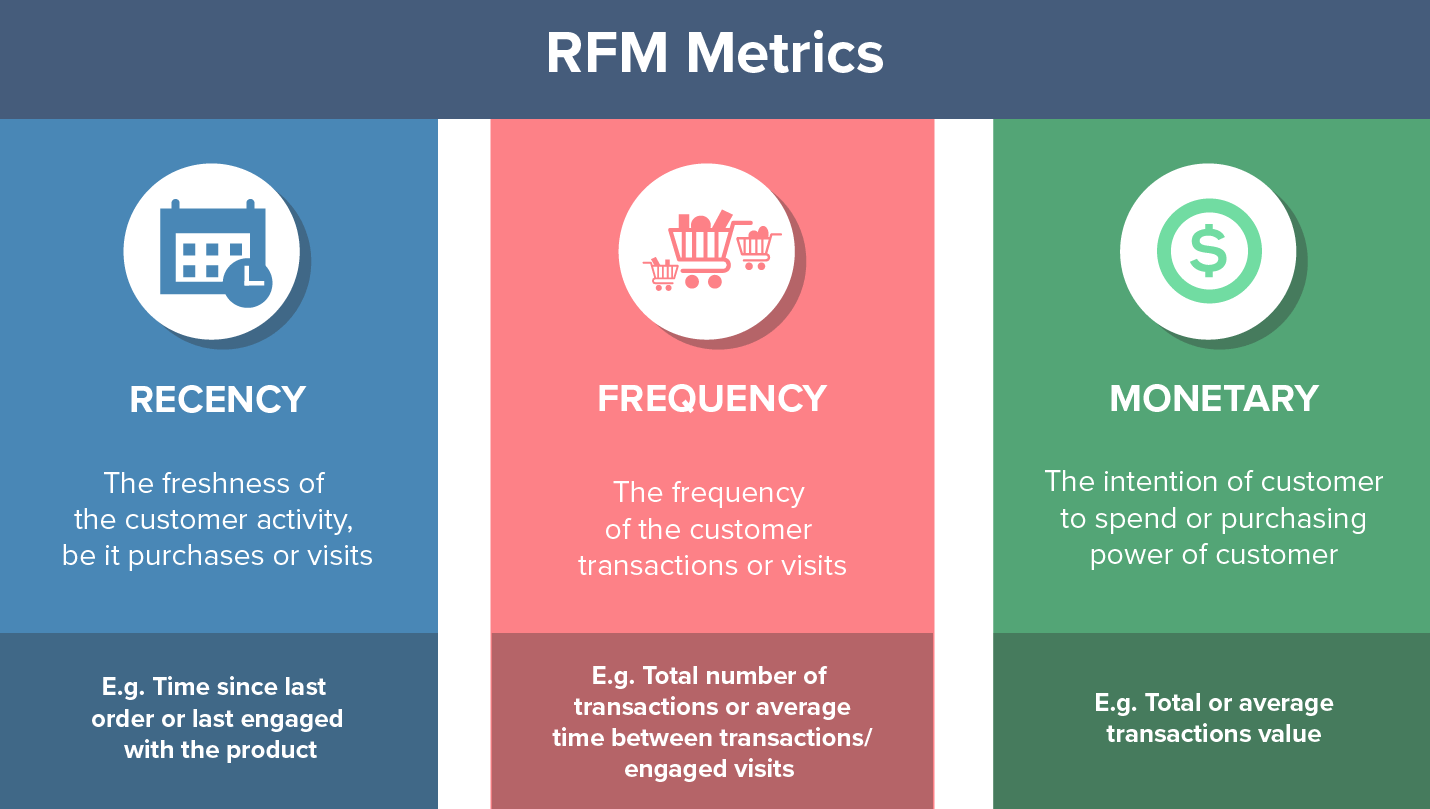

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

#### Context
This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers. source : http://archive.ics.uci.edu/ml/datasets/online+retail

#### Content
Attribute Information:

- **InvoiceNo**: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- **StockCode**: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- **Description**: Product (item) name. Nominal.
- **Quantity**: The quantities of each product (item) per transaction. Numeric.
- **InvoiceDate**: Invice date and time. Numeric. The day and time when a transaction was generated.
- **UnitPrice**: Unit price. Numeric. Product price per unit in sterling (Â£).
- **CustomerID**: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- **Country**: Country name. Nominal. The name of the country where a customer resides.

#### Acknowledgements
- Chen, D. Sain, S.L., and Guo, K. (2012), Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208. doi: [Web Link].

- Chen, D., Guo, K. and Ubakanma, G. (2015), Predicting customer profitability over time based on RFM time series, International Journal of Business Forecasting and Marketing Intelligence, Vol. 2, No. 1, pp.1-18. doi: [Web Link].

- Chen, D., Guo, K., and Li, Bo (2019), Predicting Customer Profitability Dynamically over Time: An Experimental Comparative Study, 24th Iberoamerican Congress on Pattern Recognition (CIARP 2019), Havana, Cuba, 28-31 Oct, 2019.

- Laha Ale, Ning Zhang, Huici Wu, Dajiang Chen, and Tao Han, Online Proactive Caching in Mobile Edge Computing Using Bidirectional Deep Recurrent Neural Network, IEEE Internet of Things Journal, Vol. 6, Issue 3, pp. 5520-5530, 2019.

- Rina Singh, Jeffrey A. Graves, Douglas A. Talbert, William Eberle, Prefix and Suffix Sequential Pattern Mining, Industrial Conference on Data Mining 2018: Advances in Data Mining. Applications and Theoretical Aspects, pp. 309-324. 2018.

In [3]:
df = pd.read_excel("Online Retail.xlsx")

### Data Cleaning

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.drop(index=df[df.CustomerID.isna()].index,inplace=True)
df.reset_index(drop=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [7]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
df.Country.value_counts().head(10)

United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         1877
Portugal            1480
Australia           1259
Name: Country, dtype: int64

> Our sales dominated by United Kingdom customers. We know that retail based on United Kingdom too. 

In [9]:
df.drop(index=df[df.InvoiceNo.str.contains('C') == True].index,inplace=True)
df.reset_index(drop=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


> We have Canceled order with Invoice number with contains C. This dataset clean from data cancelation order from our customers. Let's Check our stock Code and Description for our product for each invoice number that we have.

In [10]:
list_stockcode = df.StockCode.value_counts().index

In [11]:
x = []
for item in list_stockcode:
    if isinstance(item, str) == True:
        x.append(item)

In [12]:
df[df.Description == 'D']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [13]:
for item in x:
    if item.isalpha():
        print(item)

POST
M
DOT
PADS


In [14]:
df[df.StockCode.str.contains(' ') == True]['StockCode'].value_counts()

BANK CHARGES    12
Name: StockCode, dtype: int64

> In this dataset we have **stock code** with ***POST, M, DOT, PADS, Bank Charges & C2***. Let's explore what the meaning that stock code. If we can't finding the meaning of this code, I assump we should drop all rows with this stock code.

In [15]:
df[(df.StockCode == 'POST')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583.0,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662.0,Germany
5073,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738.0,Germany
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686.0,France
...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.0,12423.0,Belgium
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.0,12518.0,Germany
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.0,12662.0,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.0,12526.0,Germany


In [16]:
df[(df.StockCode == 'POST') & (df.Country == 'United Kingdom')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
29018,538685,POST,POSTAGE,1,2010-12-14 09:39:00,15.00,15694.0,United Kingdom
136219,547941,POST,POSTAGE,1,2011-03-28 14:46:00,150.00,16692.0,United Kingdom
152729,549689,POST,POSTAGE,1,2011-04-11 13:40:00,4.95,15971.0,United Kingdom
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom
206296,554924,POST,POSTAGE,1,2011-05-27 12:54:00,4.00,12748.0,United Kingdom
224385,556519,POST,POSTAGE,1,2011-06-13 10:54:00,2.02,16794.0,United Kingdom
261369,559835,POST,POSTAGE,1,2011-07-13 10:08:00,15.00,13509.0,United Kingdom
276546,561057,POST,POSTAGE,1,2011-07-24 13:18:00,2.90,17935.0,United Kingdom
278550,561216,POST,POSTAGE,8,2011-07-25 17:04:00,15.00,14606.0,United Kingdom
279831,561368,POST,POSTAGE,1,2011-07-26 16:00:00,36.50,14866.0,United Kingdom


In [17]:
df[df.InvoiceNo == 536370]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France
32,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,2010-12-01 08:45:00,1.25,12583.0,France
33,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,2010-12-01 08:45:00,2.95,12583.0,France
34,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,2010-12-01 08:45:00,2.95,12583.0,France
35,536370,22629,SPACEBOY LUNCH BOX,24,2010-12-01 08:45:00,1.95,12583.0,France


In [18]:
df[df.InvoiceNo == 536403]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
385,536403,22867,HAND WARMER BIRD DESIGN,96,2010-12-01 11:27:00,1.85,12791.0,Netherlands
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands


> Some Invoice have postage, even the item were sent to United Kingdom or outside United Kingdom. So, we included the stock code with POST to RFM Analysis.

In [19]:
df[df.StockCode == 'M']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062.0,United Kingdom
8530,537137,M,Manual,36,2010-12-05 12:43:00,0.85,16327.0,United Kingdom
...,...,...,...,...,...,...,...,...
526015,580645,M,Manual,1,2011-12-05 13:11:00,219.50,17857.0,United Kingdom
526018,580646,M,Manual,800,2011-12-05 13:13:00,0.25,17857.0,United Kingdom
530876,580884,M,Manual,1,2011-12-06 12:21:00,0.85,15907.0,United Kingdom
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom


> We didnt have information about this stock code. I assump to drop all rows with stock code wtih 'M'.

In [20]:
df[df.StockCode == 'DOT']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
317507,564764,DOT,DOTCOM POSTAGE,1,2011-08-30 10:49:00,11.17,14096.0,United Kingdom
324002,565383,DOT,DOTCOM POSTAGE,1,2011-09-02 15:45:00,16.46,14096.0,United Kingdom
333755,566217,DOT,DOTCOM POSTAGE,1,2011-09-09 15:17:00,13.16,14096.0,United Kingdom
338829,566566,DOT,DOTCOM POSTAGE,1,2011-09-13 12:32:00,85.58,14096.0,United Kingdom
350599,567656,DOT,DOTCOM POSTAGE,1,2011-09-21 14:40:00,878.55,14096.0,United Kingdom
361584,568346,DOT,DOTCOM POSTAGE,1,2011-09-26 15:28:00,688.08,14096.0,United Kingdom
372766,569246,DOT,DOTCOM POSTAGE,1,2011-10-03 09:57:00,490.25,14096.0,United Kingdom
389983,570488,DOT,DOTCOM POSTAGE,1,2011-10-10 17:12:00,635.01,14096.0,United Kingdom
401766,571441,DOT,DOTCOM POSTAGE,1,2011-10-17 13:31:00,743.62,14096.0,United Kingdom
416463,572552,DOT,DOTCOM POSTAGE,1,2011-10-24 17:07:00,638.30,14096.0,United Kingdom


In [21]:
df[df.InvoiceNo == 565383]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
323984,565383,20718,RED RETROSPOT SHOPPER BAG,1,2011-09-02 15:45:00,2.46,14096.0,United Kingdom
323985,565383,20733,GOLD MINI TAPE MEASURE,2,2011-09-02 15:45:00,0.83,14096.0,United Kingdom
323986,565383,21914,BLUE HARMONICA IN BOX,1,2011-09-02 15:45:00,2.46,14096.0,United Kingdom
323987,565383,22086,PAPER CHAIN KIT 50'S CHRISTMAS,1,2011-09-02 15:45:00,5.79,14096.0,United Kingdom
323988,565383,22188,BLACK HEART CARD HOLDER,1,2011-09-02 15:45:00,8.29,14096.0,United Kingdom
323989,565383,22354,RETROSPOT PADDED SEAT CUSHION,1,2011-09-02 15:45:00,7.46,14096.0,United Kingdom
323990,565383,22356,CHARLOTTE BAG PINK POLKADOT,2,2011-09-02 15:45:00,1.63,14096.0,United Kingdom
323991,565383,22446,PIN CUSHION BABUSHKA PINK,2,2011-09-02 15:45:00,2.46,14096.0,United Kingdom
323992,565383,22457,NATURAL SLATE HEART CHALKBOARD,1,2011-09-02 15:45:00,5.79,14096.0,United Kingdom
323993,565383,22492,MINI PAINT SET VINTAGE,1,2011-09-02 15:45:00,1.63,14096.0,United Kingdom


> I assump stock code with code 'DOT', its same for postage and all transaction in United Kingdom.

In [22]:
df[df.StockCode == 'PADS']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom
358655,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 12:22:00,0.000,16133.0,United Kingdom
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom


> I assump stock code with code "PADS" meaning cost of packaging in that Invoice for buying a pads.

In [23]:
df[df.StockCode == 'C2']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.0,14911.0,EIRE
12119,537368,C2,CARRIAGE,1,2010-12-06 12:40:00,50.0,14911.0,EIRE
12452,537378,C2,CARRIAGE,1,2010-12-06 13:06:00,50.0,14911.0,EIRE
19975,537963,C2,CARRIAGE,1,2010-12-09 11:30:00,50.0,13369.0,United Kingdom
20016,538002,C2,CARRIAGE,1,2010-12-09 11:48:00,50.0,14932.0,Channel Islands
...,...,...,...,...,...,...,...,...
513202,579539,C2,CARRIAGE,1,2011-11-30 10:06:00,50.0,14911.0,EIRE
515000,579768,C2,CARRIAGE,1,2011-11-30 15:08:00,50.0,14911.0,EIRE
516484,579910,C2,CARRIAGE,1,2011-12-01 08:52:00,50.0,14911.0,EIRE
518905,580127,C2,CARRIAGE,1,2011-12-01 17:51:00,50.0,14911.0,EIRE


In [24]:
df[df.InvoiceNo == 536540]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1404,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4,2010-12-01 14:05:00,9.95,14911.0,EIRE
1405,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2010-12-01 14:05:00,2.95,14911.0,EIRE
1406,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,2010-12-01 14:05:00,2.55,14911.0,EIRE
1407,536540,22355,CHARLOTTE BAG SUKI DESIGN,50,2010-12-01 14:05:00,0.85,14911.0,EIRE
1408,536540,21579,LOLITA DESIGN COTTON TOTE BAG,6,2010-12-01 14:05:00,2.25,14911.0,EIRE
1409,536540,21576,LETS GO SHOPPING COTTON TOTE BAG,6,2010-12-01 14:05:00,2.25,14911.0,EIRE
1410,536540,22147,FELTCRAFT BUTTERFLY HEARTS,12,2010-12-01 14:05:00,1.45,14911.0,EIRE
1411,536540,22150,3 STRIPEY MICE FELTCRAFT,12,2010-12-01 14:05:00,1.95,14911.0,EIRE
1412,536540,22492,MINI PAINT SET VINTAGE,36,2010-12-01 14:05:00,0.65,14911.0,EIRE
1413,536540,22493,PAINT YOUR OWN CANVAS SET,24,2010-12-01 14:05:00,1.65,14911.0,EIRE


In [25]:
df[df.InvoiceNo == 537963]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
19962,537963,37446,MINI CAKE STAND WITH HANGING CAKES,32,2010-12-09 11:30:00,1.25,13369.0,United Kingdom
19963,537963,37449,CERAMIC CAKE STAND + HANGING CAKES,2,2010-12-09 11:30:00,9.95,13369.0,United Kingdom
19964,537963,37495,FAIRY CAKE BIRTHDAY CANDLE SET,4,2010-12-09 11:30:00,3.75,13369.0,United Kingdom
19965,537963,22227,HANGING HEART MIRROR DECORATION,24,2010-12-09 11:30:00,0.65,13369.0,United Kingdom
19966,537963,84875B,GREEN SQUARE COMPACT MIRROR,4,2010-12-09 11:30:00,3.75,13369.0,United Kingdom
19967,537963,84877D,BLUE ROUND COMPACT MIRROR,4,2010-12-09 11:30:00,3.75,13369.0,United Kingdom
19968,537963,22893,MINI CAKE STAND T-LIGHT HOLDER,24,2010-12-09 11:30:00,0.42,13369.0,United Kingdom
19969,537963,21231,SWEETHEART CERAMIC TRINKET BOX,12,2010-12-09 11:30:00,1.25,13369.0,United Kingdom
19970,537963,21733,RED HANGING HEART T-LIGHT HOLDER,12,2010-12-09 11:30:00,2.95,13369.0,United Kingdom
19971,537963,84876D,BLUE HEART COMPACT MIRROR,4,2010-12-09 11:30:00,3.75,13369.0,United Kingdom


> I assump stock code with code "C2" meaning cost of carriage for all item on that Invoice.

In [26]:
df.drop(index=df[df.StockCode == 'M'].index,inplace=True)
df.reset_index(drop=True,inplace=True)

In [27]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


The conclusion is we try drop all stock code with "M". There's no information about this code and after we explore the stock code with M we can't take a conclusion

In [28]:
a = df[df.UnitPrice == 0]['Description'].values

In [29]:
df[df['Description'] == 'PARTY BUNTING']['UnitPrice'].values[1]

4.65

In [30]:
for item in a :
    print(df[df['Description'] == item]['UnitPrice'].values[1])

7.95
5.95
12.75
2.95
1.65
8.5
0.65
2.95
1.65
2.95
8.5
4.65
3.75
9.95
4.25
2.08
1.45
1.45
2.1
0.42
0.001
3.39
1.65
2.89
1.45
1.95
8.5
2.1
3.75
0.85
2.95
1.65
9.95
0.21


In [31]:
def applyUnitPrice(x):
    if x['UnitPrice'] == 0 :
        return df[df['Description'] == x['Description']]['UnitPrice'].values[1]
    else :
        return x['UnitPrice']

In [32]:
df['UnitPrice'] = df.apply(applyUnitPrice,axis=1)

In [33]:
df['CustomerID'] = df.CustomerID.astype(int)

In [34]:
df.to_csv('OnlineRetail_Clean.csv')

> Some invoice have unit price with zero values. I'll try to fill that zero values based on description item in this dataset. Now we have clean data for RFM Analysis.

#### Calculation for Recency, Frequency & Monetary

In [35]:
df = pd.read_csv('OnlineRetail_Clean.csv')

In [36]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [37]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [38]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
397629   2011-12-09 12:50:00
397630   2011-12-09 12:50:00
397631   2011-12-09 12:50:00
397632   2011-12-09 12:50:00
397633   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397634, dtype: datetime64[ns]

In [39]:
from datetime import timedelta
# --Grouping data by customerID--

# Calcuation Monetary
df['TotalSum'] = df['Quantity'] * df['UnitPrice']

# Calculation Recency 
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)

# Grouping by CustomerID
## and Calculation frequency 
rfm = df.groupby(['CustomerID']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'count',
        'TotalSum': 'sum'})

# Rename the columns 
rfm.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'Monetary'}, inplace=True)

In [40]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
12350,310,17,334.40
...,...,...,...
18280,278,10,180.60
18281,181,7,80.82
18282,8,12,178.05


> Now we have dataframe with recency, frequency & monetary score. In this analysis we will show segmentation with RFM analysis and clustering method. We'll try with KMeans Clustering, HDBSCAN. How much best segmentation with this dataset from that clustering method.

### Exploratory Data Analysis

In [41]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
397629,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397630,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397631,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397632,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


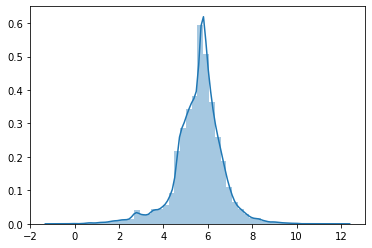

In [42]:
sns.distplot(np.log(df.groupby(['InvoiceNo']).agg({'TotalSum': 'sum'})))

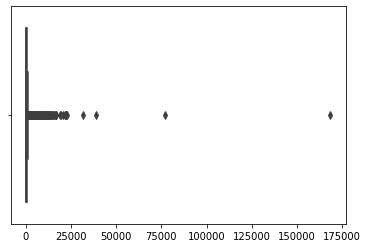

In [43]:
sns.boxplot(df.groupby(['InvoiceNo']).agg({'TotalSum': 'sum'}))

> So many Outliers in this dataset especially for total charges for each transaction. Let's see that outlier data with tracking their Invoice number.

In [44]:
total_transaction = df.groupby(['InvoiceNo']).agg({'TotalSum': 'sum'})

In [45]:
total_transaction['TotalSum'].sort_values(ascending=False).head(10)

InvoiceNo
581483    168469.60
541431     77183.60
556444     38970.00
567423     31698.16
556917     22775.93
572209     22206.00
567381     22104.80
563614     21880.44
550461     21535.90
572035     20277.92
Name: TotalSum, dtype: float64

In [46]:
df[df['InvoiceNo'] == 581483]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
397161,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6


In [47]:
df[df['InvoiceNo'] == 541431]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
37092,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6


In [48]:
df[df['InvoiceNo'] == 556444]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
155293,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.5,15098,United Kingdom,38970.0


In [49]:
df[df['InvoiceNo'] == 567381]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
248411,567381,21876,POTTERING MUG,624,2011-09-20 10:12:00,1.48,17450,United Kingdom,923.52
248412,567381,21873,IF YOU CAN'T STAND THE HEAT MUG,624,2011-09-20 10:12:00,1.48,17450,United Kingdom,923.52
248413,567381,21874,GIN AND TONIC MUG,744,2011-09-20 10:12:00,1.48,17450,United Kingdom,1101.12
248414,567381,21877,HOME SWEET HOME MUG,624,2011-09-20 10:12:00,1.48,17450,United Kingdom,923.52
248415,567381,23108,SET OF 10 LED DOLLY LIGHTS,416,2011-09-20 10:12:00,6.50,17450,United Kingdom,2704.00
248416,567381,22766,PHOTO FRAME CORNICE,416,2011-09-20 10:12:00,3.20,17450,United Kingdom,1331.20
248417,567381,21485,RETROSPOT HEART HOT WATER BOTTLE,496,2011-09-20 10:12:00,5.10,17450,United Kingdom,2529.60
248418,567381,22508,DOORSTOP RETROSPOT HEART,744,2011-09-20 10:12:00,4.08,17450,United Kingdom,3035.52
248419,567381,22111,SCOTTIE DOG HOT WATER BOTTLE,496,2011-09-20 10:12:00,5.10,17450,United Kingdom,2529.60
248420,567381,22138,BAKING SET 9 PIECE RETROSPOT,416,2011-09-20 10:12:00,5.10,17450,United Kingdom,2121.60


In [50]:
rfm.loc[16446]

Recency           1.0
Frequency         3.0
Monetary     168472.5
Name: 16446, dtype: float64

> From the transaction for each Invoice number we have conclude that transaction with 1 item with very high quantity. The higest spend on this retail with **customer id 16446**,and then they buying 3 times.

In [51]:
month = []
for item in df.InvoiceDate:
    if item.month ==1 :
        month.append('Jan')
    elif item.month == 2 :
        month.append('Feb')
    elif item.month == 3 :
        month.append('Mar')
    elif item.month == 4:
        month.append('Apr')
    elif item.month == 5:
        month.append('Mei')
    elif item.month == 6:
        month.append('Jun')
    elif item.month ==7 :
        month.append('Jul')
    elif item.month ==8 :
        month.append('Aug')
    elif item.month ==9 :
        month.append('Sep')
    elif item.month ==10 :
        month.append('Oct')
    elif item.month ==11 :
        month.append('Nov')
    else :
        month.append('Dec')

year = []
for item in df.InvoiceDate:
    year.append(item.year)

In [52]:
x = []
for m,y in zip(month,year):
    x.append(m + ' ' + str(y)[2:4])

In [53]:
df['TransactionMonth'] = x

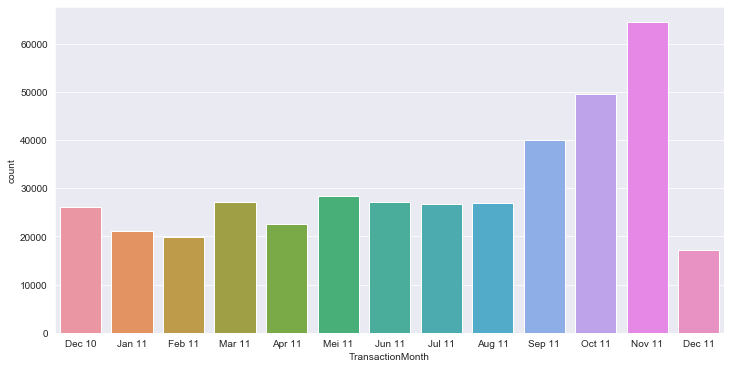

In [54]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.countplot(df['TransactionMonth'])

In [55]:
r = df.groupby(['TransactionMonth']).agg({'TotalSum': 'sum','InvoiceNo': 'count'})
r = r.sort_values(by='TotalSum',ascending=False)
r

,TotalSum,InvoiceNo
TransactionMonth,,
Nov 11,1162266.650,64502
Oct 11,1017790.190,49508
Sep 11,949407.143,40008
Mei 11,674610.250,28307
Jun 11,660442.580,27172
Aug 11,643634.040,27002
Jul 11,598599.941,26803
Mar 11,590702.300,27153
Dec 10,572644.970,26133


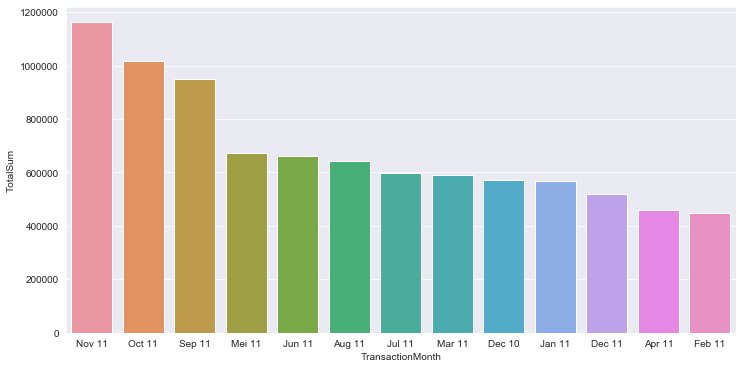

In [56]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.barplot(y=r['TotalSum'],x=r.index)

> From the two graph above we conlude that frequency for highest transaction (by frequency) is November and look the pattern in the end of the year the sales in our retail is increase from September until November. In the end of the year even total invoice or total charges for each transaction *increase* significant **(around 25%)** for each month (Sep - Nov).

In [57]:
rfm.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

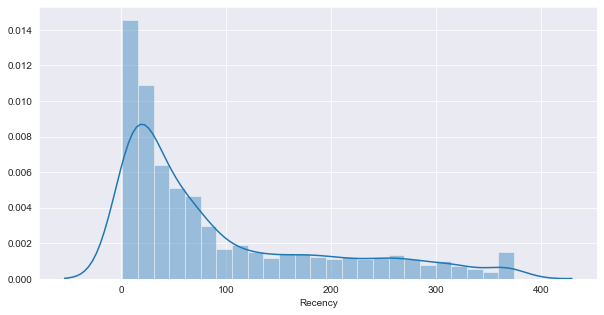

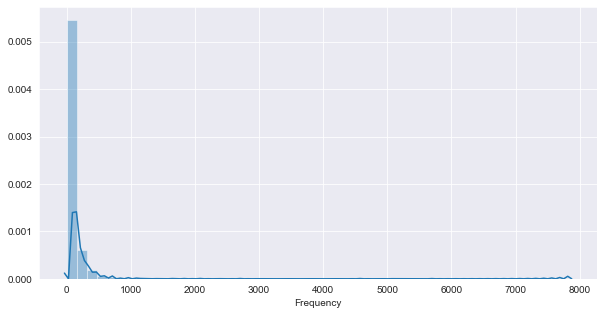

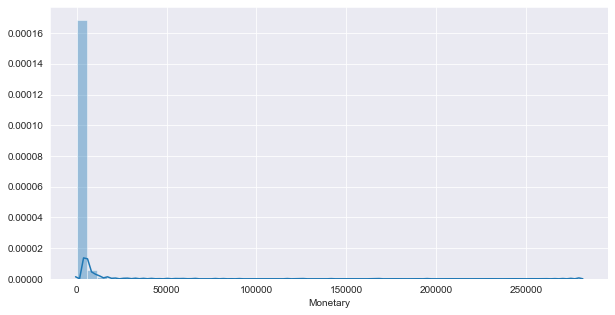

In [58]:
for item in rfm.columns:
    plt.figure(figsize=(10,5))
    sns.distplot(rfm[item])
    plt.show

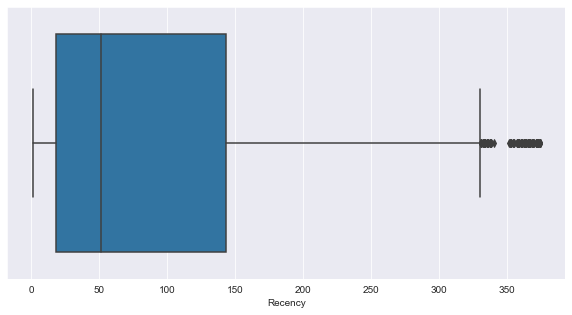

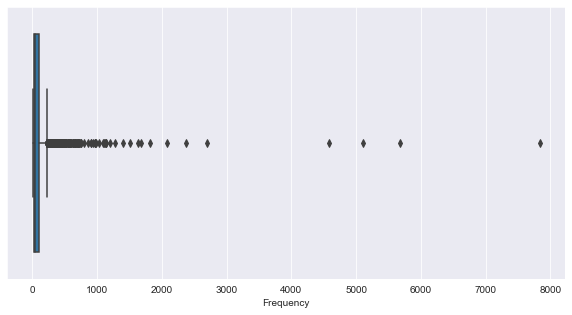

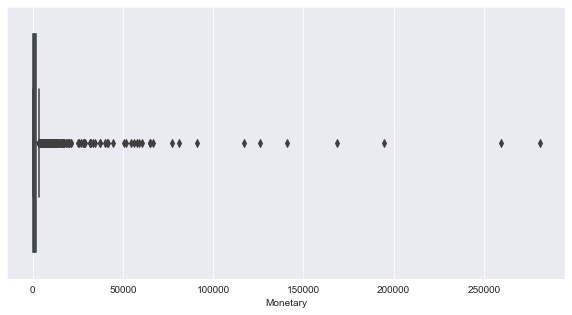

In [59]:
for item in rfm.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(rfm[item])
    plt.show

> There is so many outliers in this transaction for each customer. We conclude we try to using robust scaller to scaling this dataset. Before we jump to modeling, we try using RFM analysis segmentation for our retail. Let's see how that it works.

### Segmentation with RFM Analysis

In [60]:
# --Calculate R and F groups--
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)

# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(rfm['Recency'], q=4, labels=r_labels)

# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)

# Create new columns R and F 
rfm = rfm.assign(R = r_groups.values, F = f_groups.values)
rfm.head()

,Recency,Frequency,Monetary,R,F
CustomerID,,,,,
12346,326,1,77183.60,1,1
12347,2,182,4310.00,4,4
12348,75,31,1797.24,2,2
12349,19,73,1757.55,3,3
12350,310,17,334.40,1,1


In [61]:
# Create labels for MonetaryValue
m_labels = range(1, 5)

# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(rfm['Monetary'], q=4, labels=m_labels)

# Create new column M
rfm = rfm.assign(M = m_groups.values)

In [62]:
rfm

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346,326,1,77183.60,1,1,4
12347,2,182,4310.00,4,4,4
12348,75,31,1797.24,2,2,4
12349,19,73,1757.55,3,3,4
12350,310,17,334.40,1,1,2
...,...,...,...,...,...,...
18280,278,10,180.60,1,1,1
18281,181,7,80.82,1,1,1
18282,8,12,178.05,4,1,1


In [63]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment_Concat'] = rfm.apply(join_rfm, axis=1)
rfm.head()

# Count num of unique segments
rfm_count_unique = rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(rfm_count_unique.sum())

61


In [64]:
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return "Champions"
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return "Can't Loose Them"
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
    
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346,326,1,77183.60,1,1,4,114,6.0,Potential
12347,2,182,4310.00,4,4,4,444,12.0,Champions
12348,75,31,1797.24,2,2,4,224,8.0,Can't Loose Them
12349,19,73,1757.55,3,3,4,334,10.0,Champions
12350,310,17,334.40,1,1,2,112,4.0,Needs Attention


In [65]:
# Define rfm_level function
def rfm_labels(df):
    if df['RFM_Level'] == "Champions":
        return 1
    elif df['RFM_Level'] == "Can't Loose Them":
        return 2
    elif df['RFM_Level'] == "Loyal":
        return 3
    elif df['RFM_Level'] == "Potential":
        return 4
    elif df['RFM_Level'] == "Promising":
        return 5
    elif df['RFM_Level'] == "Needs Attention":
        return 6
    else:
        return 7

In [66]:
rfm['RFM_Labels'] = rfm.apply(rfm_labels, axis=1)

In [67]:
rfm

,Recency,Frequency,Monetary,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level,RFM_Labels
CustomerID,,,,,,,,,,
12346,326,1,77183.60,1,1,4,114,6.0,Potential,4
12347,2,182,4310.00,4,4,4,444,12.0,Champions,1
12348,75,31,1797.24,2,2,4,224,8.0,Can't Loose Them,2
12349,19,73,1757.55,3,3,4,334,10.0,Champions,1
12350,310,17,334.40,1,1,2,112,4.0,Needs Attention,6
...,...,...,...,...,...,...,...,...,...,...
18280,278,10,180.60,1,1,1,111,3.0,Require Activation,7
18281,181,7,80.82,1,1,1,111,3.0,Require Activation,7
18282,8,12,178.05,4,1,1,411,6.0,Potential,4


In [68]:
rfm['RFM_Level'].unique()

array(['Potential', 'Champions', "Can't Loose Them", 'Needs Attention',
       'Require Activation', 'Loyal', 'Promising'], dtype=object)

In [97]:
level_7 = rfm[rfm['RFM_Labels'] == 7]
level_6 = rfm[rfm['RFM_Labels'] == 6]
level_5 = rfm[rfm['RFM_Labels'] == 5]
level_4 = rfm[rfm['RFM_Labels'] == 4]
level_3 = rfm[rfm['RFM_Labels'] == 3]
level_2 = rfm[rfm['RFM_Labels'] == 2]
level_1 = rfm[rfm['RFM_Labels'] == 1]

data = [level_1,level_2,level_3,level_4,level_4, level_5, level_6,level_7]
colors = ("purple", "green", "blue",'yellow','cyan','darkgrey','red')
groups = ["Champions", "Can't Loose Them",'Loyal','Potential', 'Promising',
          'Needs Attention','Require Activation']

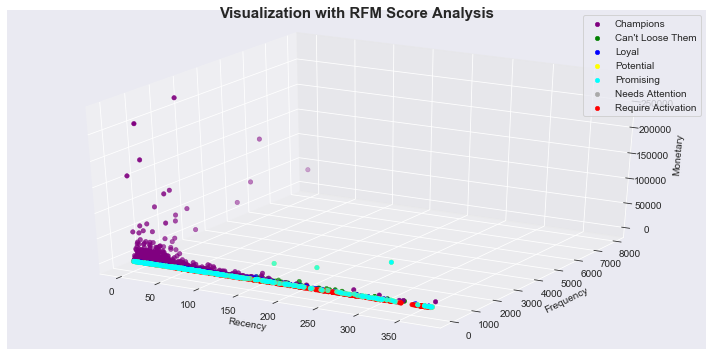

In [98]:
level_7 = rfm[rfm['RFM_Labels'] == 7]
level_6 = rfm[rfm['RFM_Labels'] == 6]
level_5 = rfm[rfm['RFM_Labels'] == 5]
level_4 = rfm[rfm['RFM_Labels'] == 4]
level_3 = rfm[rfm['RFM_Labels'] == 3]
level_2 = rfm[rfm['RFM_Labels'] == 2]
level_1 = rfm[rfm['RFM_Labels'] == 1]

from mpl_toolkits import mplot3d
plt.figure(figsize=(10,5))
ax = plt.axes(projection='3d')
for item,c,g in zip(data,colors,groups):
    ax.scatter(item['Recency'], item['Frequency'], item['Monetary'], c=c,label=g,
           linewidth=0.5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.suptitle('Visualization with RFM Score Analysis',fontsize=15,fontweight='semibold')
plt.legend()
plt.tight_layout()

No handles with labels found to put in legend.


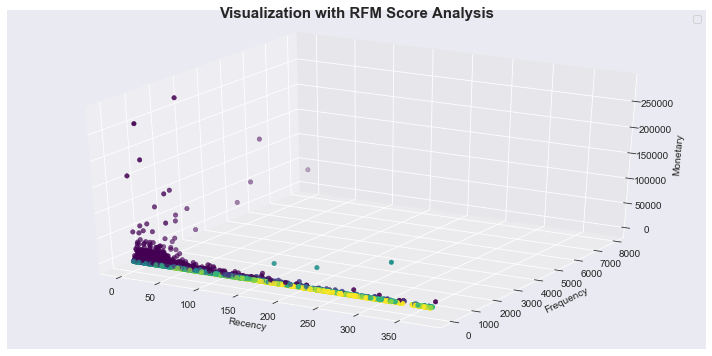

In [71]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(10,5))
ax = plt.axes(projection='3d')
ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], c=rfm['RFM_Labels'], cmap='viridis',
           linewidth=0.5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.suptitle('Visualization with RFM Score Analysis',fontsize=15,fontweight='semibold')
plt.legend()
plt.tight_layout()

In [72]:
rfm.groupby(['RFM_Level']).agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Monetary' : 'mean',
    'RFM_Labels' : 'count'
})

,Recency,Frequency,Monetary,RFM_Labels
RFM_Level,,,,
Can't Loose Them,64.682713,57.137856,989.309803,457
Champions,26.254914,191.481834,4374.745797,1679
Loyal,80.325380,38.750542,747.717722,461
Needs Attention,175.630890,13.654450,238.135314,382
Potential,96.575492,27.881838,830.306611,457
Promising,154.362403,21.422481,367.803432,516
Require Activation,261.007812,8.197917,158.687370,384


### Modeling

In [73]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler,StandardScaler

In [74]:
# Scaling with Robust Scaler
rfm_model = rfm[['Recency','Frequency','Monetary']]

In [75]:
standar = StandardScaler()

In [76]:
standar.fit(rfm_model)

StandardScaler()

In [77]:
rfm_model = standar.transform(rfm_model)

In [78]:
rfm_model = pd.DataFrame(rfm_model, columns=['Recency','Frequency','Monetary'])

In [79]:
rfm_model['CustomerId'] = rfm.index

In [80]:
# Modeling with KMeans
inertia_list = []

for i in range(1,100):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm_model[['Recency','Frequency','Monetary']])
    inertia_list.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

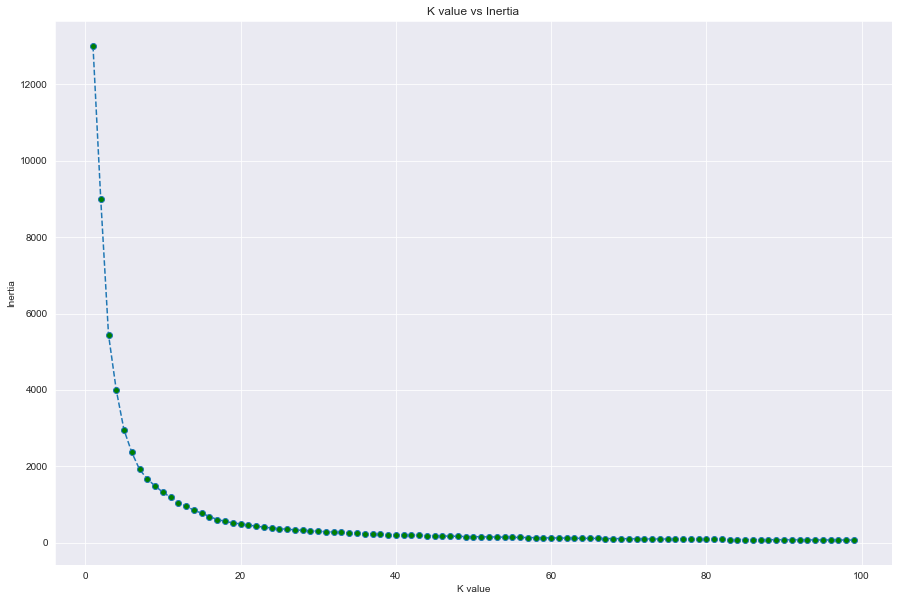

In [81]:
plt.figure(figsize=(15,10))
plt.plot(range(1,100),inertia_list,marker='o',markerfacecolor='green',linestyle='dashed')
plt.title('K value vs Inertia')
plt.xlabel('K value')
plt.ylabel('Inertia')

In [82]:
from sklearn.metrics import silhouette_samples

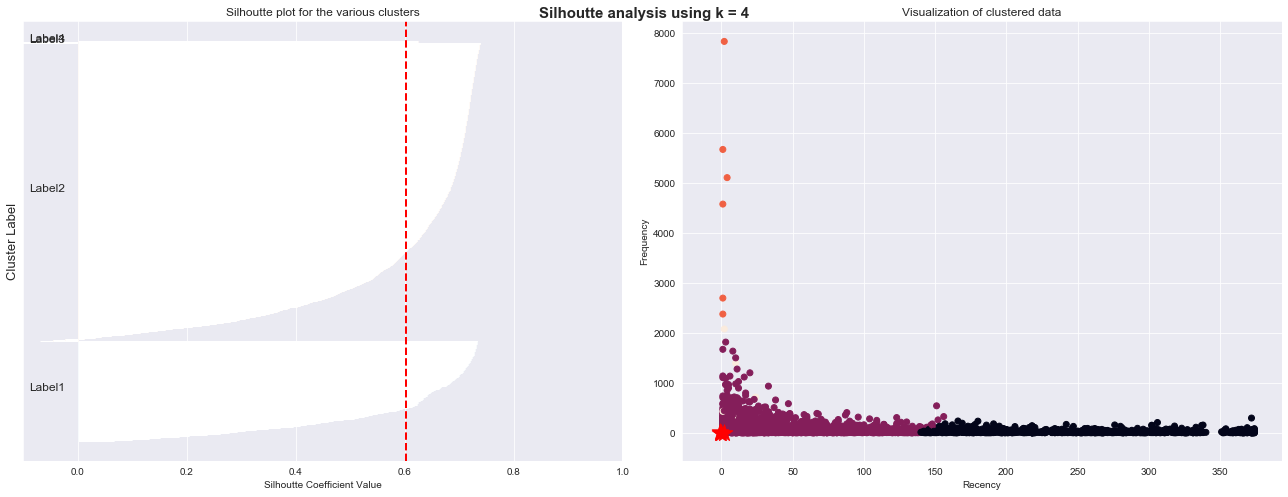

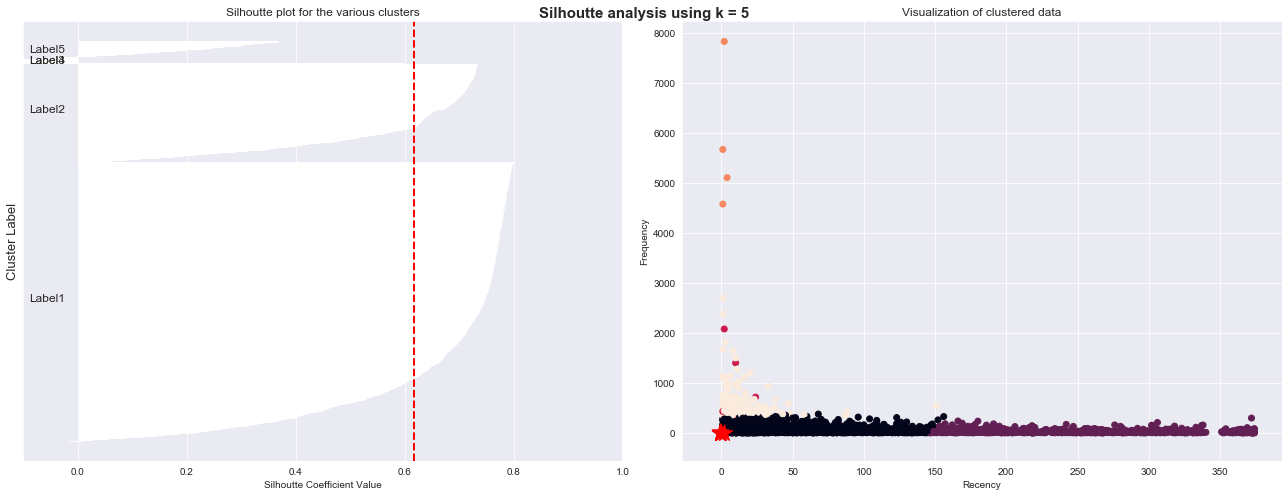

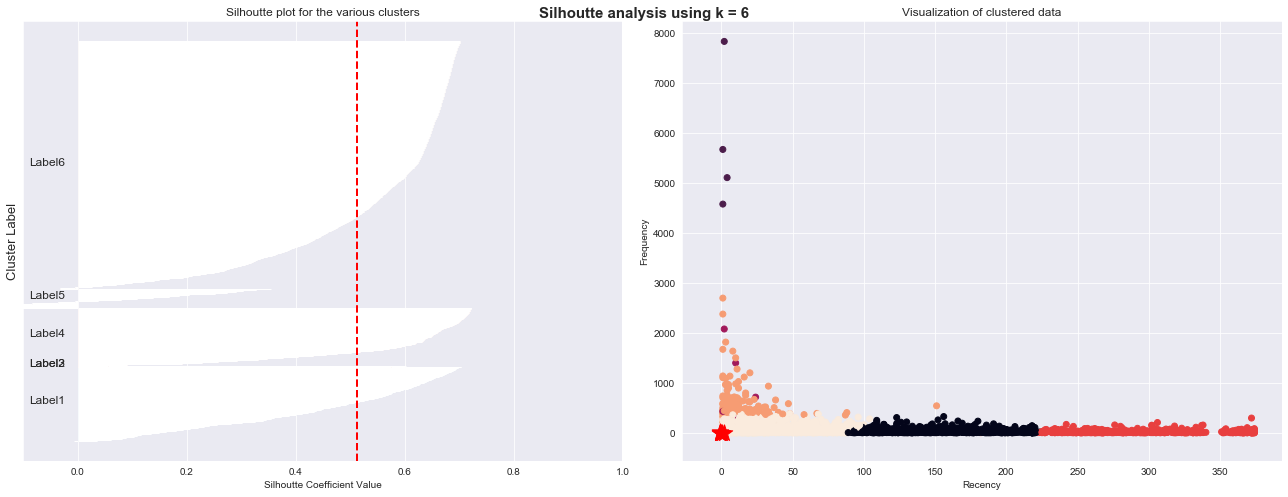

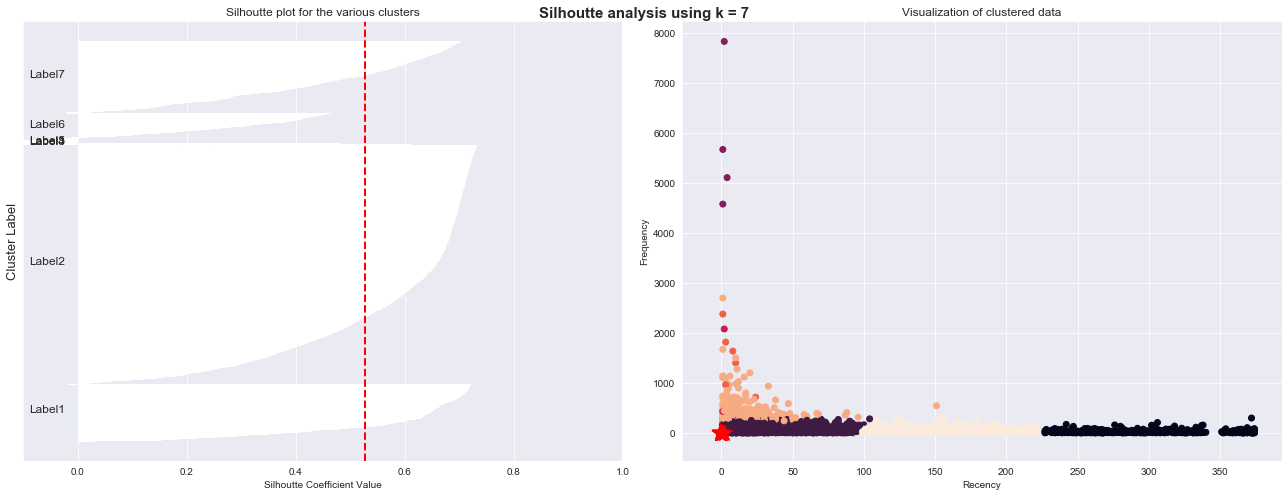

In [83]:
for i,k in enumerate(list(range(4,8))):
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    # Running Kmeans Algorithm 
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(rfm_model[['Recency','Frequency','Monetary']])
    centroids = km.cluster_centers_
    
    ## Get silhoutte samples 
    silhoutte_vals = silhouette_samples(rfm_model[['Recency','Frequency','Monetary']], labels)
    
    ## Silhoutte plot
    y_ticks = []
    y_lower, y_upper = 0,0
    for i, cluster in enumerate(np.unique(labels)):
        clusters_silhoutte_vals = silhoutte_vals[labels == cluster]
        clusters_silhoutte_vals.sort()
        y_upper += len(clusters_silhoutte_vals)
        ax1.barh(range(y_lower, y_upper), clusters_silhoutte_vals, height=1)
        ax1.text(-0.09,(y_lower+y_upper)/2, 'Label' + str(i+1), fontsize=12)
        y_lower += len(clusters_silhoutte_vals)
        
    ## Get average silhoutte score and using plot above 
    avg_score = np.mean(silhoutte_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth = 2, color='red')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1,1])
    ax1.set_xlabel('Silhoutte Coefficient Value')
    ax1.set_ylabel('Cluster Label', fontsize=13)
    ax1.set_title('Silhoutte plot for the various clusters')
    
    ## Scatter plot of data colored with labels(cluster)
    ax2.scatter(rfm['Recency'], rfm['Frequency'], c=labels)
    ax2.scatter(centroids[:,0],centroids[:,1],c='red',marker='*',s=300)
    ax2.set_xlabel('Recency')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Visualization of clustered data')
    plt.suptitle('Silhoutte analysis using k = {}'.format(k),fontsize=15,fontweight='semibold')
    plt.tight_layout()
    

> From silhouette anaylsis we know about best cluster with highest silhouetter score, I take 4 cluster with highest score. So the result is segmentation customer with Kmeans is 4 cluster. 

In [84]:
km = KMeans(n_clusters=4)
labels = km.fit_predict(rfm_model[['Recency','Frequency','Monetary']])
centroids = km.cluster_centers_
silhoutte_vals = silhouette_samples(rfm_model[['Recency','Frequency','Monetary']], labels)

In [85]:
df_Kmeans = rfm[['Recency','Frequency','Monetary']]

No handles with labels found to put in legend.


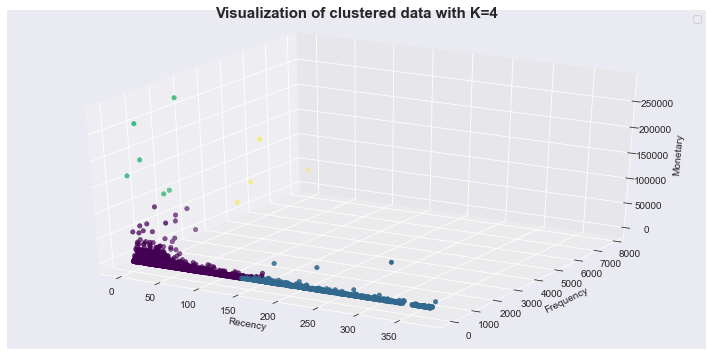

In [86]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(10,5))
ax = plt.axes(projection='3d')
ax.scatter(df_Kmeans['Recency'], df_Kmeans['Frequency'], df_Kmeans['Monetary'], c=labels, 
           cmap='viridis', linewidth=0.5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.suptitle('Visualization of clustered data with K=4',fontsize=15,fontweight='semibold')
plt.legend()
plt.tight_layout()

In [87]:
np.mean(silhoutte_vals)

0.600670272814117

> We have silhouette score with 0.60, so I'll take this lables for segmentation our customers. Let's see characteristic for each segmentation that we done with KMeans

In [88]:
df_Kmeans['Labels'] = labels

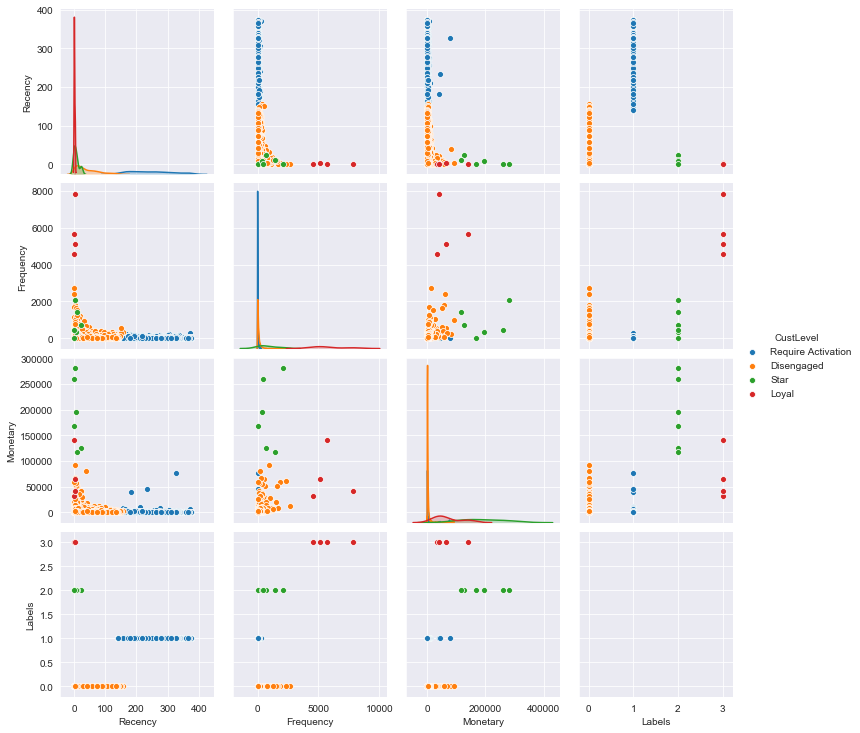

In [95]:
sns.pairplot(df_Kmeans,hue='CustLevel')

In [90]:
df_Kmeans.groupby(['Labels']).agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Monetary' : 'mean',
    'Labels' : 'count'
})

,Recency,Frequency,Monetary,Labels
Labels,,,,
0,41.271270,104.578298,2079.468818,3244
1,247.539741,27.920518,638.574299,1082
2,7.666667,827.833333,191147.581667,6
3,2.000000,5801.250000,69882.812500,4


- Recency: When was the last time they purchased?
- Frequency: How often and for how long have they purchased?
- Monetary Value/Sales: How much have they purchased

In [91]:
def applyLevel(x):
    if x['Labels'] == 0 :
        return 'Disengaged'
    elif x['Labels'] == 1 :
        return 'Require Activation'
    elif x['Labels'] == 2 :
        return 'Star'
    else :
        return 'Loyal'

In [92]:
df_Kmeans

,Recency,Frequency,Monetary,Labels
CustomerID,,,,
12346,326,1,77183.60,1
12347,2,182,4310.00,0
12348,75,31,1797.24,0
12349,19,73,1757.55,0
12350,310,17,334.40,1
...,...,...,...,...
18280,278,10,180.60,1
18281,181,7,80.82,1
18282,8,12,178.05,0


In [93]:
df_Kmeans['CustLevel'] = df_Kmeans.apply(applyLevel,axis=1)

In [94]:
df_Kmeans.groupby(['CustLevel']).agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Monetary' : 'mean',
    'Labels' : 'count'
})

,Recency,Frequency,Monetary,Labels
CustLevel,,,,
Disengaged,41.271270,104.578298,2079.468818,3244
Loyal,2.000000,5801.250000,69882.812500,4
Require Activation,247.539741,27.920518,638.574299,1082
Star,7.666667,827.833333,191147.581667,6


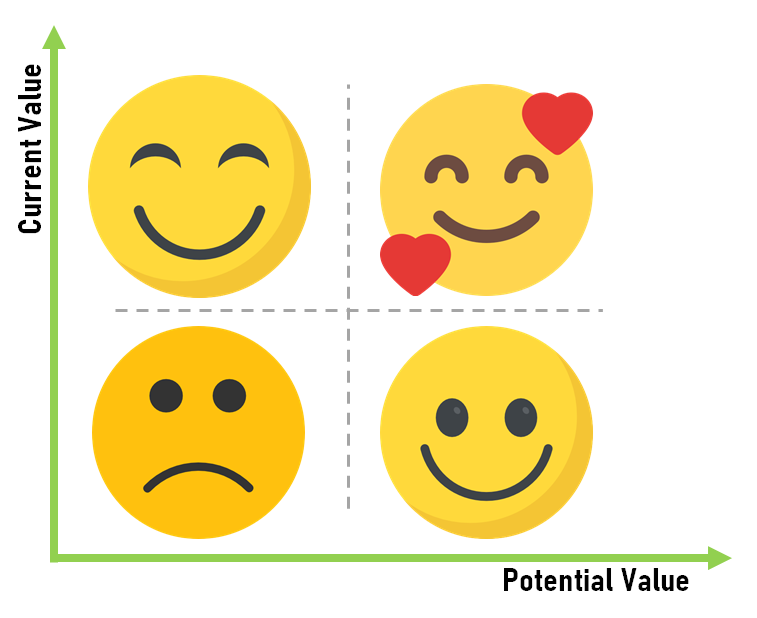

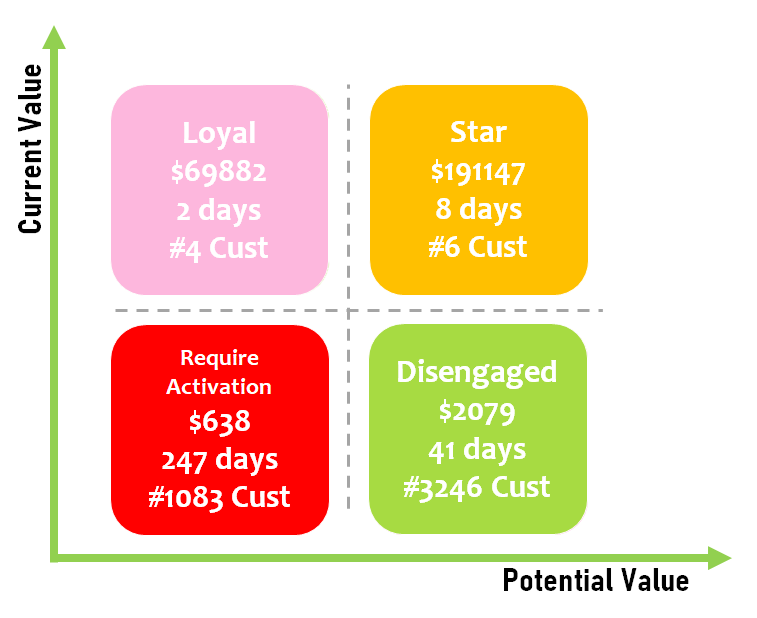